<a href="https://colab.research.google.com/github/zezeko/tf_specialization/blob/master/nlp/Course_3_Week_3_Lesson_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer LSTM

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [0]:
# If the tf.__version__ is 1.x, please run this cell
#!pip install tensorflow==2.0.0-beta0

In [5]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 119s 303ms/step - loss: 0.5065 - accuracy: 0.7470 - val_loss: 0.4151 - val_accuracy: 0.8127
Epoch 2/10
391/391 [==============================] - 108s 275ms/step - loss: 0.3643 - accuracy: 0.8506 - val_loss: 0.4103 - val_accuracy: 0.8400
Epoch 3/10
391/391 [==============================] - 109s 278ms/step - loss: 0.3794 - accuracy: 0.8442 - val_loss: 0.6141 - val_accuracy: 0.6645
Epoch 4/10
391/391 [==============================] - 111s 285ms/step - loss: 0.3610 - accuracy: 0.8484 - val_loss: 0.4668 - val_accuracy: 0.7920
Epoch 5/10
391/391 [==============================] - 110s 280ms/step - loss: 0.3659 - accuracy: 0.8410 - val_loss: 0.5798 - val_accuracy: 0.7165
Epoch 6/10
391/391 [==============================] - 109s 279ms/step - loss: 0.3608 - accuracy: 0.8442 - val_loss: 0.4825 - val_accuracy: 0.8015
Epoch 7/10
391/391 [==============================] - 110s 280ms/step - loss: 0.2444 - accuracy: 0.9078 - val_loss: 0.4372 -

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

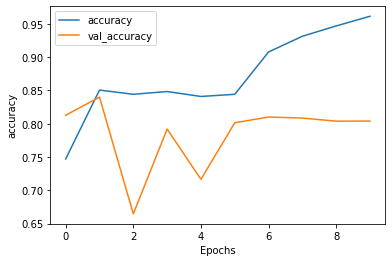

In [13]:
plot_graphs(history, 'accuracy')

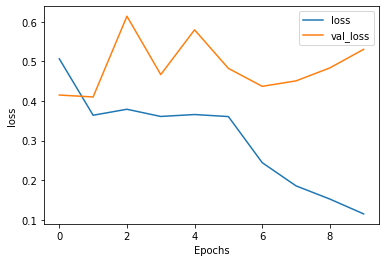

In [14]:
plot_graphs(history, 'loss')